In [214]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection

In [247]:
DATASET = '../datasets/blobs2.csv'
data = pd.read_csv(DATASET)
train_data, test_data = sklearn.model_selection.train_test_split(data, train_size=0.8, test_size=0.2)

### Color Scheme
https://coolors.co/f7c0c2-ef767a-456990-99adc2-eeb868

# General functions

In [248]:
def gen_polynomials_of_degree(y0, y1, degree):
    return [y0 ** (degree - i) * y1 ** i for i in range(degree + 1)]
    
def gen_polynomials_up_to_degree(y0, y1, degree):
    polys = []
    for d in range(degree + 1):
        polys.extend(gen_polynomials_of_degree(y0, y1, d))
    return polys

def augment_data(data):
    try:
        data.insert(2, 'xy1', [row[0] ** 2 * row[1] ** 0 for index, row in data.iterrows()])
        data.insert(3, 'xy2', [row[0] ** 1 * row[1] ** 1 for index, row in data.iterrows()])
        data.insert(4, 'xy3', [row[0] ** 0 * row[1] ** 2 for index, row in data.iterrows()])

        data.insert(5, 'xy4', [row[0] ** 3 * row[1] ** 0 for index, row in data.iterrows()])
        data.insert(6, 'xy5', [row[0] ** 2 * row[1] ** 1 for index, row in data.iterrows()])
        data.insert(7, 'xy6', [row[0] ** 1 * row[1] ** 2 for index, row in data.iterrows()])
        data.insert(8, 'xy7', [row[0] ** 0 * row[1] ** 3 for index, row in data.iterrows()])

        data.insert(9,  'xy8', [row[0] ** 4 * row[1] ** 0 for index, row in data.iterrows()])
        data.insert(10, 'xy9', [row[0] ** 3 * row[1] ** 1 for index, row in data.iterrows()])
        data.insert(11, 'xy10', [row[0] ** 2 * row[1] ** 2 for index, row in data.iterrows()])
        data.insert(12, 'xy11', [row[0] ** 1 * row[1] ** 3 for index, row in data.iterrows()])
        data.insert(13, 'xy12', [row[0] ** 0 * row[1] ** 4 for index, row in data.iterrows()])
    except ValueError:
        print('already augmented, skipping')
    return data

def calc_accuracy(w, x_i_generator):
    tp_tn = 0
    def calc_h(x_row):
        val = np.matmul(w, np.transpose(x_row))
        return -1 if val < 0 else 1
    def to_pm(val):
        return -1 if val == 0 else 1
    for index, row in test_data.iterrows():
        y0, y1 = row.values[:2]
        x_i = np.array(x_i_generator(y0, y1))
        y_i = to_pm(row.values[-1])
        tp_tn += calc_h(x_i) == y_i
    return tp_tn

def perceptron(train_data, dim=3, x_i_generator=lambda y0, y1: [1, y0, y1], max_iterations=10):
    weights = []
    w = np.array([random.random() for _ in range(dim)])
    weights.append(list(w))
    def calc_h(x_row):
        val = np.matmul(w, np.transpose(x_row))
        return -1 if val < 0 else 1
    def to_pm(val):
        return -1 if val == 0 else 1
    for _ in range(max_iterations):
        adjusted = False
        for index, row in train_data.iterrows():
            y0, y1 = row.values[:2]
            x_i = np.array(x_i_generator(y0, y1))
            y_i = to_pm(row.values[-1])
            if calc_h(x_i) != y_i:
                w = list(w + x_i * y_i)
                weights.append(w)
                adjusted = True
                break
        if not adjusted:
            break
    return weights

def draw_data_points():
    test_data_0 = [x for _, x in test_data.iterrows() if x[-1] == 0]
    test_data_1 = [x for _, x in test_data.iterrows() if x[-1] == 1]
    xs0 = [x['x'] for x in test_data_0]
    ys0 = [x['y'] for x in test_data_0]
    xs1 = [x['x'] for x in test_data_1]
    ys1 = [x['y'] for x in test_data_1]
    plt.plot(xs0, ys0, 'bo')
    plt.plot(xs1, ys1, 'ro')
    
def draw_best_weight(w, x_i_generator, num_points=100, markersize=4):    
    def calc_h(x_row):
        val = np.matmul(w, np.transpose(x_row))
        return -1 if val < 0 else 1
    def to_pm(val):
        return -1 if val == 0 else 1
    
    ys = []
    
    for x in np.linspace(-2, 5, 100):
        for y in np.linspace(-1, 7, 100):
            ys.append([x, y])
            
    class0 = [y for y in ys if calc_h(x_i_generator(y[0], y[1])) == -1]
    class1 = [y for y in ys if calc_h(x_i_generator(y[0], y[1])) == 1]
    
    plt.plot([y[0] for y in class0], [y[1] for y in class0], 'o', markersize=4, color='#B9B9FF')
    plt.plot([y[0] for y in class1], [y[1] for y in class1], 'o', markersize=4, color='#FFD4D4')
    
    draw_data_points()
    
def compute_and_show(dim, x_i_generator, num_points=100, markersize=4):
    weights = perceptron(train_data, dim, x_i_generator)
    best_weight = max(weights, key=lambda x: calc_accuracy(x, x_i_generator))
    draw_best_weight(best_weight, x_i_generator)

In [249]:
train_data = augment_data(train_data)
test_data = augment_data(test_data)

In [250]:
train_data.head()

,x,y,xy1,xy2,xy3,xy4,xy5,xy6,xy7,xy8,xy9,xy10,xy11,xy12,label
793,2.737011,-0.671889,7.491232,-1.838967,0.451434,20.503588,-5.033273,1.235581,-0.303313,56.118556,-13.776125,3.381798,-0.830172,0.203793,1
914,1.222023,4.654728,1.493339,5.688182,21.666488,1.824894,6.951086,26.476936,100.851600,2.230061,8.494384,32.355412,123.242925,469.436717,0
496,2.820314,2.429570,7.954169,6.852148,5.902808,22.433251,19.325207,16.647770,14.341283,63.268804,54.503144,46.951934,40.446916,34.843145,1
758,0.966796,4.313561,0.934695,4.170335,18.606812,0.903660,4.031865,17.988997,80.261625,0.873655,3.897992,17.391696,77.596643,346.213448,0
533,2.468008,4.190747,6.091065,10.342799,17.562362,15.032799,25.526113,43.344055,73.599418,37.101073,62.998660,106.973488,181.643975,308.436553,0


In [251]:
gen_polynomials_up_to_degree(3, 5, 2)

[1, 3, 5, 9, 15, 25]

# Nth-degree polynomial features
# ==============================================================

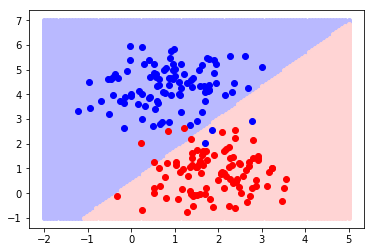

In [257]:
n = 1
compute_and_show((n + 1) * (n + 2) // 2, lambda y0, y1: gen_polynomials_up_to_degree(y0, y1, n))

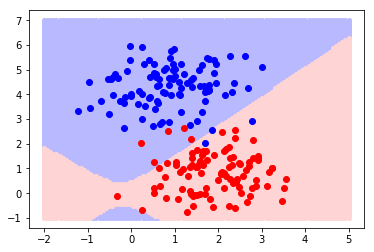

In [258]:
n = 2
compute_and_show((n + 1) * (n + 2) // 2, lambda y0, y1: gen_polynomials_up_to_degree(y0, y1, n))

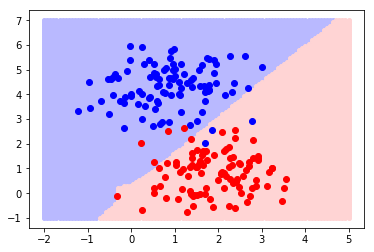

In [259]:
n = 3
compute_and_show((n + 1) * (n + 2) // 2, lambda y0, y1: gen_polynomials_up_to_degree(y0, y1, n))

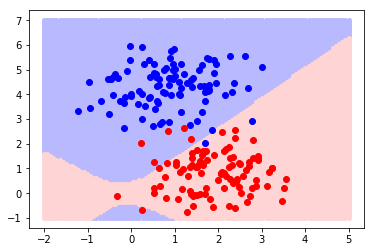

In [260]:
n = 4
compute_and_show((n + 1) * (n + 2) // 2, lambda y0, y1: gen_polynomials_up_to_degree(y0, y1, n))